In [1]:
import pandas as pd
data = pd.read_csv("application_record.csv")
data2 = pd.read_csv("credit_record.csv")

Соединяем все файлы вместе, ключ - ID, способ соединения - Left join

In [2]:
data = pd.merge(
    data,
    data2,
    on='ID',
    how='left',
    suffixes=('', '_1')
)
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096116,6508904,F,N,Y,0,180000.0,Working,Secondary / secondary special,Separated,House / apartment,-18274.0,-3772.0,1.0,0.0,0.0,0.0,Laborers,1.0,NaN,NaN
1096117,6508907,F,N,N,0,90000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-20068.0,-3042.0,1.0,1.0,0.0,0.0,Cleaning staff,2.0,NaN,NaN
1096118,6508908,F,N,Y,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-15709.0,-242.0,1.0,0.0,0.0,0.0,Accountants,3.0,NaN,NaN
1096119,6508909,F,N,Y,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-15709.0,-242.0,1.0,0.0,0.0,0.0,Accountants,3.0,NaN,NaN


In [3]:
has_none = data.isnull().any()
has_none

,0
ID,False
CODE_GENDER,False
FLAG_OWN_CAR,False
FLAG_OWN_REALTY,False
CNT_CHILDREN,False
AMT_INCOME_TOTAL,False
NAME_INCOME_TYPE,False
NAME_EDUCATION_TYPE,False
NAME_FAMILY_STATUS,True
NAME_HOUSING_TYPE,True


In [4]:
unique_MONTHS_BALANCE = data["MONTHS_BALANCE"].unique()
unique_MONTHS_BALANCE

array([  0.,  -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10.,
       -11., -12., -13., -14., -15., -16., -17., -18., -19., -20., -21.,
       -22., -23., -24., -25., -26., -27., -28., -29., -30., -31., -32.,
       -33., -34., -35., -36., -37., -38., -39., -40., -41., -42.,  nan,
       -43., -44., -45., -46., -47., -48., -49., -50., -51., -52., -53.,
       -54., -55., -56., -57., -58., -59., -60.])

In [5]:
median_value = data["MONTHS_BALANCE"].median()
data["MONTHS_BALANCE"] = data["MONTHS_BALANCE"].fillna(median_value)
unique_MONTHS_BALANCE = data["MONTHS_BALANCE"].unique()
unique_MONTHS_BALANCE

array([  0.,  -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10.,
       -11., -12., -13., -14., -15., -16., -17., -18., -19., -20., -21.,
       -22., -23., -24., -25., -26., -27., -28., -29., -30., -31., -32.,
       -33., -34., -35., -36., -37., -38., -39., -40., -41., -42., -43.,
       -44., -45., -46., -47., -48., -49., -50., -51., -52., -53., -54.,
       -55., -56., -57., -58., -59., -60.])

In [6]:
unique_STATUS = data["STATUS"].unique()
unique_STATUS

array(['C', '1', '0', 'X', nan, '5', '4', '3', '2'], dtype=object)

Так как у нас нет столбца таргет, создадим его на основе столбца STATUS, а затем удалим его

In [7]:
def map_status_to_binary(status):
    if status in ["C", "X", "0"]:  # Good
        return 0
    else:
        return 1

data["target"] = data["STATUS"].apply(map_status_to_binary)

print(data["target"].value_counts())

target
0    759058
1    337063
Name: count, dtype: int64


In [8]:
data = data.drop(columns=["ID", "STATUS"])
unique_OCCUPATION_TYPE = data["OCCUPATION_TYPE"].unique()
unique_OCCUPATION_TYPE

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [9]:
data["OCCUPATION_TYPE"] = data["OCCUPATION_TYPE"].fillna("Not info")
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['OCCUPATION_TYPE'] = label_encoder.fit_transform(data['OCCUPATION_TYPE'])
unique_OCCUPATION_TYPE = data["OCCUPATION_TYPE"].unique()
unique_OCCUPATION_TYPE

array([12, 17, 15,  0,  8, 10,  4,  3,  6,  1, 13,  2,  9, 11, 16, 18,  5,
       14,  7])

In [10]:
gender_dummies = pd.get_dummies(data["CODE_GENDER"], prefix='GENDER')
data = data.drop("CODE_GENDER", axis=1)
data = pd.concat([data, gender_dummies], axis=1)

car_dummies = pd.get_dummies(data["FLAG_OWN_CAR"], prefix='CAR')
data = data.drop("FLAG_OWN_CAR", axis=1)
data = pd.concat([data, car_dummies], axis=1)

REALTY_dummies = pd.get_dummies(data["FLAG_OWN_REALTY"], prefix='REALTY')
data = data.drop("FLAG_OWN_REALTY", axis=1)
data = pd.concat([data, REALTY_dummies], axis=1)

In [11]:
data['NAME_INCOME_TYPE'] = label_encoder.fit_transform(data['NAME_INCOME_TYPE'])
data['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(data['NAME_EDUCATION_TYPE'])
data['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(data['NAME_FAMILY_STATUS'])
data['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(data['NAME_HOUSING_TYPE'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096121 entries, 0 to 1096120
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CNT_CHILDREN         1096121 non-null  int64  
 1   AMT_INCOME_TOTAL     1096121 non-null  float64
 2   NAME_INCOME_TYPE     1096121 non-null  int64  
 3   NAME_EDUCATION_TYPE  1096121 non-null  int64  
 4   NAME_FAMILY_STATUS   1096121 non-null  int64  
 5   NAME_HOUSING_TYPE    1096121 non-null  int64  
 6   DAYS_BIRTH           1096120 non-null  float64
 7   DAYS_EMPLOYED        1096120 non-null  float64
 8   FLAG_MOBIL           1096120 non-null  float64
 9   FLAG_WORK_PHONE      1096120 non-null  float64
 10  FLAG_PHONE           1096120 non-null  float64
 11  FLAG_EMAIL           1096120 non-null  float64
 12  OCCUPATION_TYPE      1096121 non-null  int64  
 13  CNT_FAM_MEMBERS      1096120 non-null  float64
 14  MONTHS_BALANCE       1096121 non-null  float64
 15

In [13]:
X = data.drop("target", axis=1)
y = data["target"]

stratify=y гарантирует, что распределение классов в y будет одинаковым в обеих выборках

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.27764	training's auc: 0.977493	valid_1's binary_logloss: 0.277443	valid_1's auc: 0.977049
[100]	training's binary_logloss: 0.172706	training's auc: 0.977947	valid_1's binary_logloss: 0.172392	valid_1's auc: 0.977578
[150]	training's binary_logloss: 0.1337	training's auc: 0.978533	valid_1's binary_logloss: 0.133343	valid_1's auc: 0.978098
[200]	training's binary_logloss: 0.117646	training's auc: 0.978887	valid_1's binary_logloss: 0.1173	valid_1's auc: 0.97841
[250]	training's binary_logloss: 0.111516	training's auc: 0.979224	valid_1's binary_logloss: 0.111163	valid_1's auc: 0.978664
[300]	training's binary_logloss: 0.109183	training's auc: 0.979564	valid_1's binary_logloss: 0.108884	valid_1's auc: 0.978926
[350]	training's binary_logloss: 0.108063	training's auc: 0.980034	valid_1's binary_logloss: 0.10777	valid_1's auc: 0.97937
[400]	training's binary_logloss: 0.107449	training's auc: 0.980369

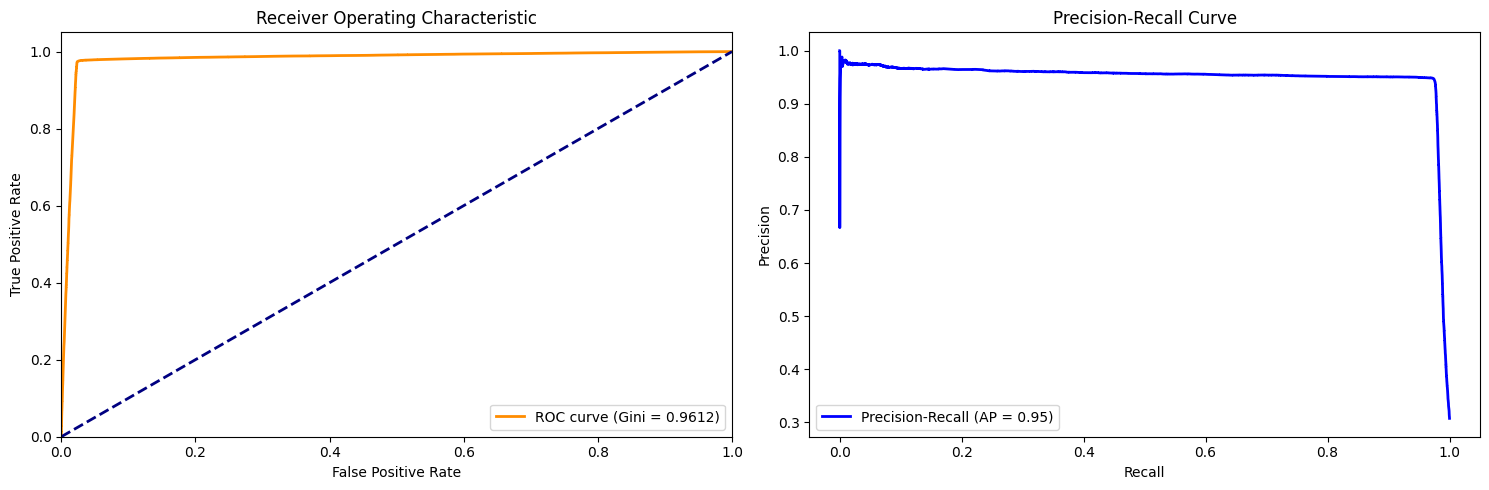


=== Дополнительные метрики ===
Average Precision: 0.9499


<Axes: title={'center': 'LogLoss'}, xlabel='Iterations', ylabel='binary_logloss'>

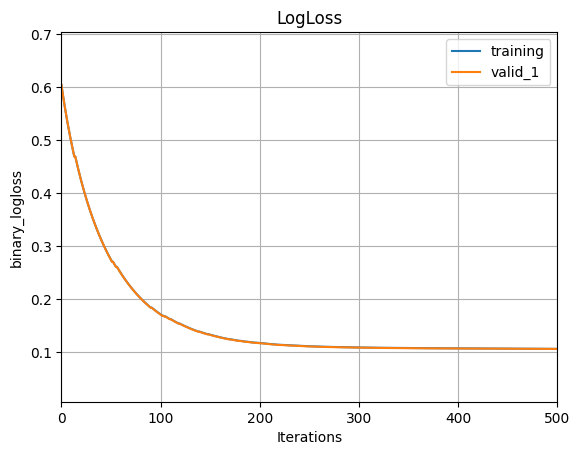

In [16]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, roc_auc_score,
                           precision_score, recall_score, f1_score,
                           classification_report, confusion_matrix)
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': ['binary_logloss', 'auc'],
    'num_leaves': 15,
    'learning_rate': 0.015,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'seed': 42,
    'min_data_in_leaf': 20,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'class_weight': 'balanced'
}


evals_result = {}
gbm = lgb.train(
    params,
    train_data,
    num_boost_round=500,
    valid_sets=[train_data, test_data],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(50),
        lgb.record_evaluation(evals_result)
    ]
)


y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred_class = np.where(y_pred > 0.5, 1, 0)


print(f"\n=== Основные метрики ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_class):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_pred):.4f}")
print(f"Gini: {2 * roc_auc_score(y_test, y_pred) - 1:.4f}")
print(f"Best iteration: {gbm.best_iteration}")


plt.figure(figsize=(15, 5))

# ROC-AUC кривая
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (Gini = {2 * roc_auc_score(y_test, y_pred) - 1:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
avg_precision = average_precision_score(y_test, y_pred)

# Precision-Recall кривая
plt.subplot(1, 2, 2)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

print("\n=== Дополнительные метрики ===")

print(f"Average Precision: {avg_precision:.4f}")

# График обучения

lgb.plot_metric(evals_result, metric='binary_logloss', title='LogLoss')


Как мы видим из графика, оубчение модели можно было останавливать после 300 дерева

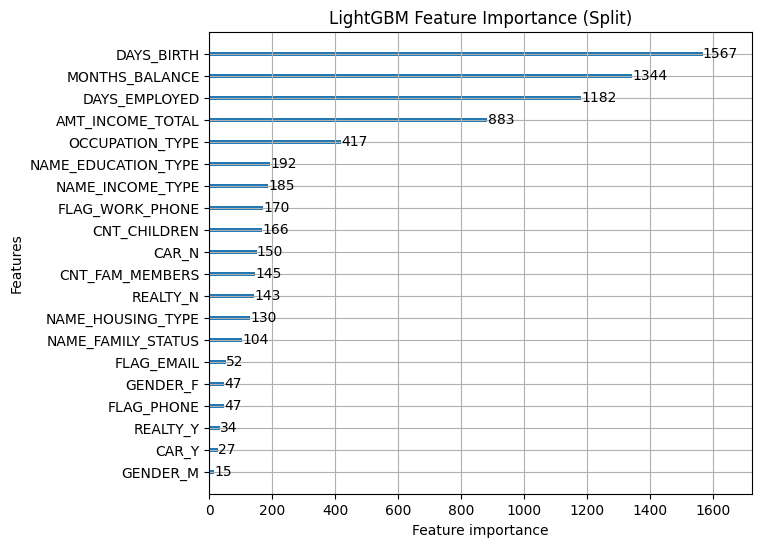

In [17]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
plot_importance(gbm, importance_type="split", figsize=(7,6),max_num_features=20, title="LightGBM Feature Importance (Split)")
plt.show()

Мы можем регулировать "важность" какого-то параметра. В этом коде  OCCUPATION_TYPE сделали в 10 раз важнее. Результат на графике ниже

Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.277473	training's auc: 0.977649	valid_1's binary_logloss: 0.278124	valid_1's auc: 0.976209
[100]	training's binary_logloss: 0.172539	training's auc: 0.9777	valid_1's binary_logloss: 0.173603	valid_1's auc: 0.976342
[150]	training's binary_logloss: 0.13362	training's auc: 0.977974	valid_1's binary_logloss: 0.134994	valid_1's auc: 0.976618
[200]	training's binary_logloss: 0.117742	training's auc: 0.978113	valid_1's binary_logloss: 0.119361	valid_1's auc: 0.976793
[250]	training's binary_logloss: 0.111834	training's auc: 0.978252	valid_1's binary_logloss: 0.113674	valid_1's auc: 0.976788
Early stopping, best iteration is:
[200]	training's binary_logloss: 0.117742	training's auc: 0.978113	valid_1's binary_logloss: 0.119361	valid_1's auc: 0.976793

=== Основные метрики ===
Accuracy: 0.9746
AUC: 0.9768
Gini: 0.9536
Best iteration: 200


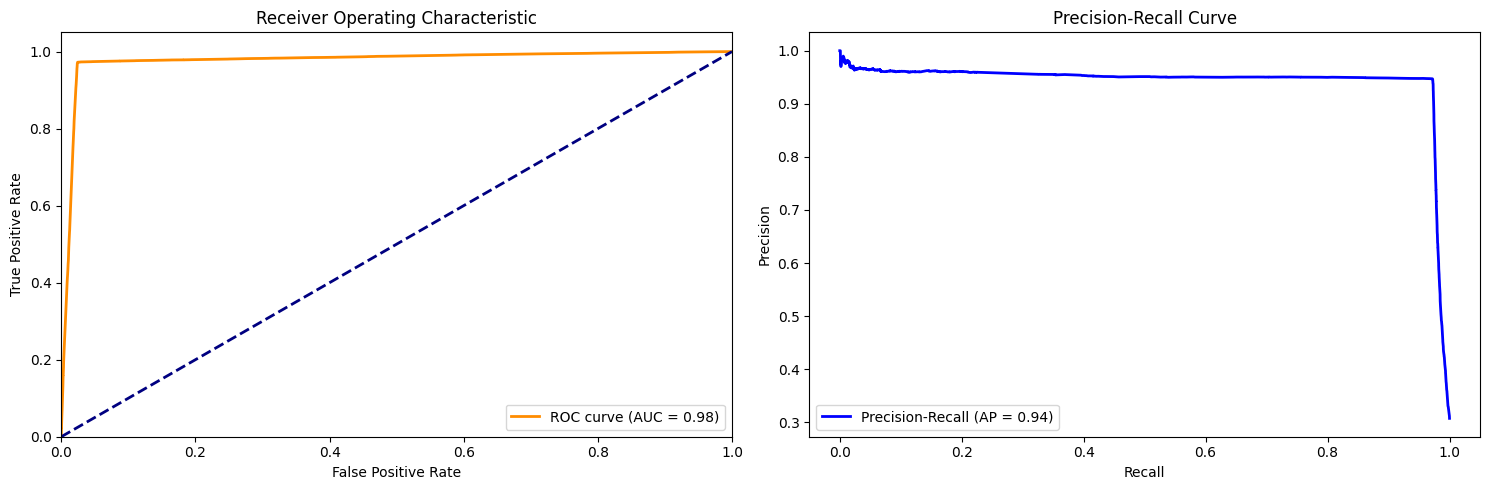


=== Дополнительные метрики ===
Average Precision: 0.9429


<Axes: title={'center': 'LogLoss'}, xlabel='Iterations', ylabel='binary_logloss'>

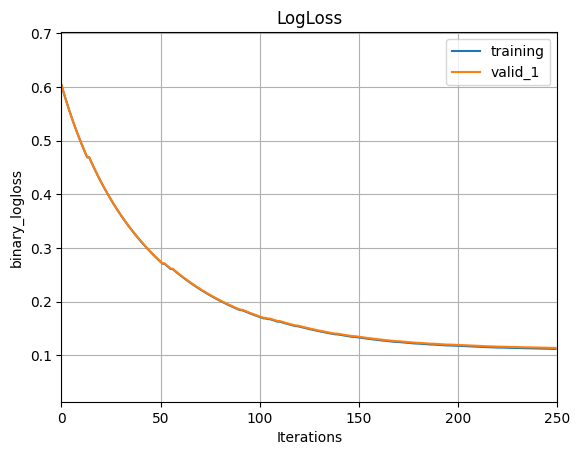

In [26]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, roc_auc_score,
                           precision_score, recall_score, f1_score,
                           classification_report, confusion_matrix)
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Создаем веса признаков с акцентом на FLAG_OWN_CAR
feature_weights = {}
for column in X_train.columns:
    feature_weights[column] = 1

# Устанавливаем высокий вес для важных признаков
feature_weights["OCCUPATION_TYPE"] = 20
weights_list = [feature_weights.get(col, 1.0) for col in X_train.columns]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)


train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': ['binary_logloss', 'auc'],
    'num_leaves': 15,
    'learning_rate': 0.015,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'seed': 42,
    'min_data_in_leaf': 20,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'class_weight': 'balanced',
    'feature_contri': weights_list
}


evals_result = {}
gbm = lgb.train(
    params,
    train_data,
    num_boost_round=500,
    valid_sets=[train_data, test_data],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(50),
        lgb.record_evaluation(evals_result)
    ]
)


y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred_class = np.where(y_pred > 0.5, 1, 0)

print(f"\n=== Основные метрики ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_class):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_pred):.4f}")
print(f"Gini: {2 * roc_auc_score(y_test, y_pred) - 1:.4f}")
print(f"Best iteration: {gbm.best_iteration}")



plt.figure(figsize=(15, 5))

# ROC-AUC кривая
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
avg_precision = average_precision_score(y_test, y_pred)

# Precision-Recall кривая
plt.subplot(1, 2, 2)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


print("\n=== Дополнительные метрики ===")

print(f"Average Precision: {avg_precision:.4f}")

# График обучения
lgb.plot_metric(evals_result, metric='binary_logloss', title='LogLoss')


Из следующего графика видно, как поменялась важность фичей. Также можно заметить, что значение метрик немного упало, так как выбранный нами признак не является ключевым для принятия решения

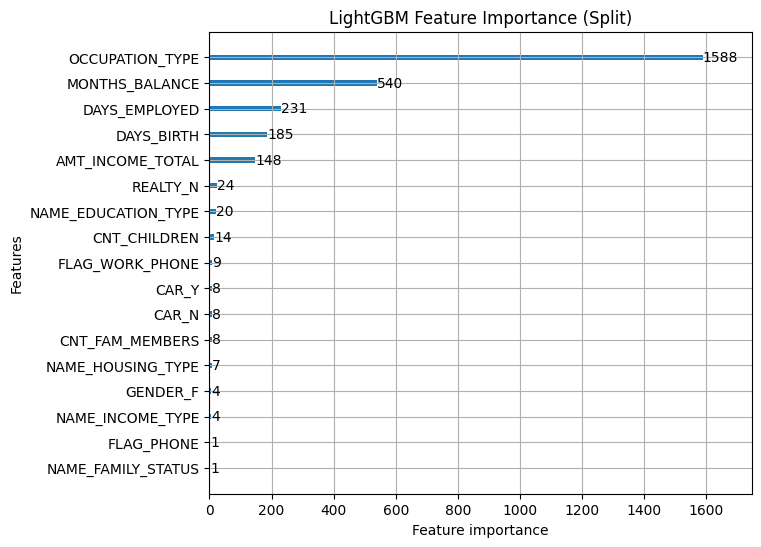

In [27]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
plot_importance(gbm, importance_type="split", figsize=(7,6),max_num_features=20, title="LightGBM Feature Importance (Split)")
plt.show()